C:\Users\Cata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


VERIDION INSURANCE COMPANY CLASSIFIER

📥 PART 1: Loading data...
✅ Loaded 9494 companies
✅ Loaded 220 taxonomy labels

📊 Sample company data:
                                         description  \
0  Welchcivils is a civil engineering and constru...   
1  Kyoto Vegetable Specialists Uekamo, also known...   
2  Loidholdhof Integrative Hofgemeinschaft is a c...   

                                       business_tags         sector  \
0  ['Construction Services', 'Multi-utilities', '...       Services   
1  ['Wholesale', 'Dual-task Movement Products', '...  Manufacturing   
2  ['Living Forms', 'Farm Cafe', 'Fresh Coffee', ...  Manufacturing   

                               category  \
0            Civil Engineering Services   
1  Fruit & Vegetable - Markets & Stores   
2        Farms & Agriculture Production   

                                              niche  
0    Other Heavy and Civil Engineering Construction  
1  Frozen Fruit, Juice, and Vegetable Manufacturing  
2            

Batches: 100%|██████████| 297/297 [06:18<00:00,  1.27s/it]



  🔄 Encoding taxonomy...


Batches: 100%|██████████| 7/7 [00:00<00:00, 17.75it/s]



✅ Embeddings created!
   Companies: torch.Size([9494, 384])
   Taxonomy: torch.Size([220, 384])

🎯 PART 4: Calculating similarities...
✅ Similarity matrix: torch.Size([9494, 220])
   Each company has 220 similarity scores

🔍 PART 5: Analyzing threshold...
✅ Saved threshold analysis to 'threshold_analysis.png'
✅ Saved threshold analysis to 'threshold_analysis.png'


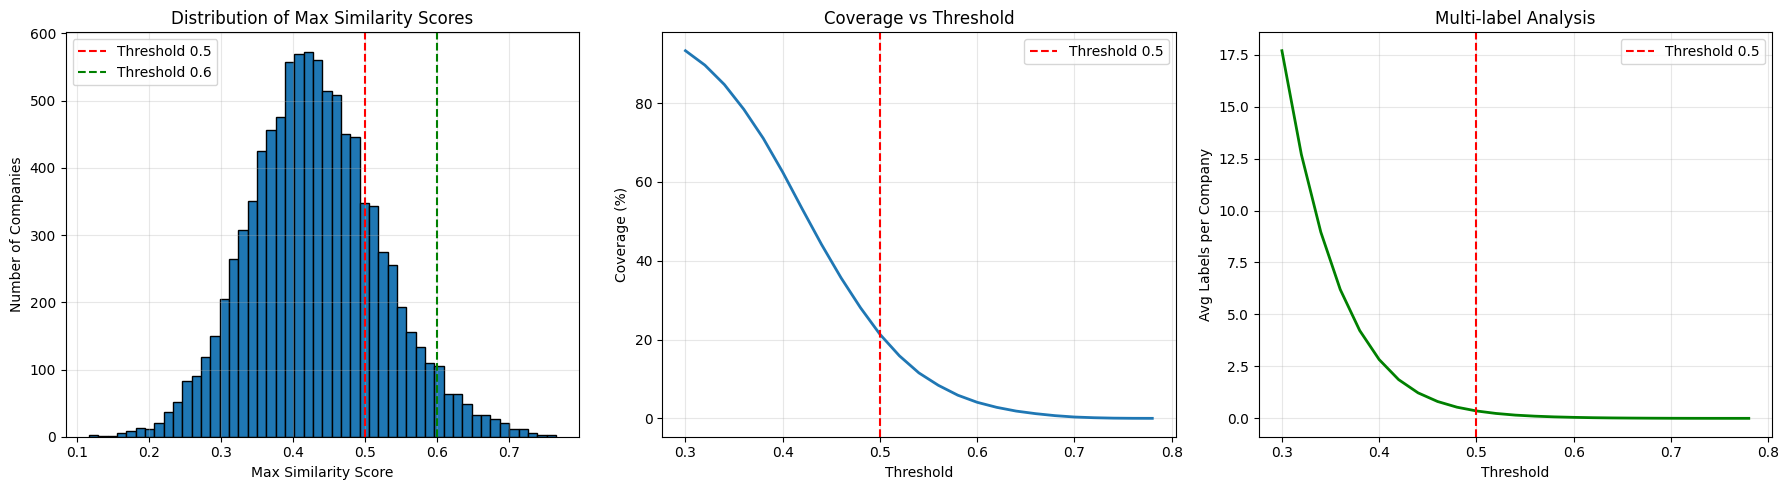


📊 Similarity Statistics:
   Mean: 0.431
   Median: 0.427
   Std: 0.091
   Min: 0.116
   Max: 0.765

📊 Coverage at different thresholds:
   0.4: 62.5% companies, avg 2.83 labels/company
   0.5: 21.3% companies, avg 0.36 labels/company
   0.6: 4.1% companies, avg 0.05 labels/company
   0.7: 0.3% companies, avg 0.00 labels/company

🏷️  PART 6: Classifying companies...

Using threshold: 0.5
Max labels per company: 3

✅ Classification complete!
   Companies with labels: 2024 (21.3%)
   Companies with 0 labels: 7470
   Companies with 1 label: 1284
   Companies with 2+ labels: 740
   Average labels per company: 0.32

📋 PART 7: Classification Examples

────────────────────────────────────────────────────────────────────────────────
Company 1:
  Name: N/A
  Description: Welchcivils is a civil engineering and construction company that specializes in designing and building utility network connections across the UK. They...

  ❌ No labels above threshold 0.5
     Top candidate: Commercial Constru

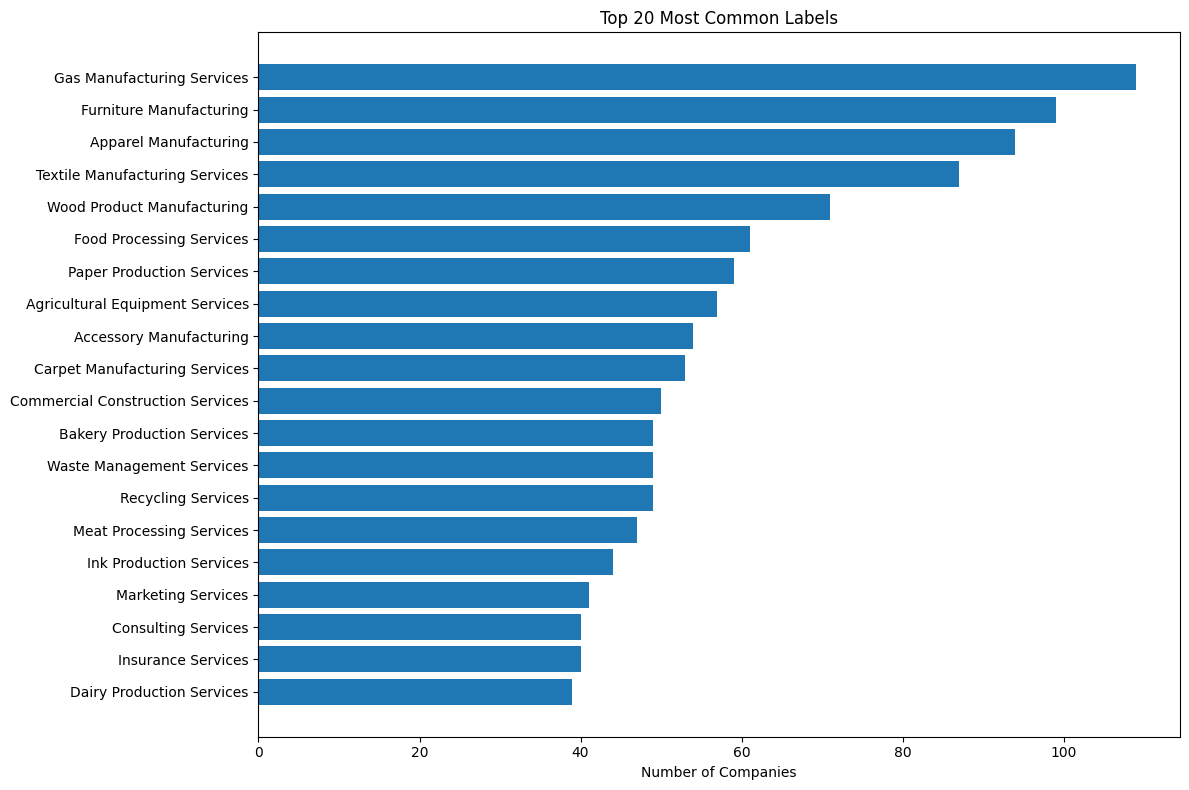


💾 PART 10: Exporting Results
✅ Saved classified companies to: 'company_list_classified.csv'
   - Original columns preserved
   - New column: 'insurance_label'
   - Metadata columns added
✅ Saved classified companies to: 'company_list_classified.csv'
   - Original columns preserved
   - New column: 'insurance_label'
   - Metadata columns added
✅ Saved detailed results to: 'classification_details.csv'

📄 PART 11: Summary Report
✅ Saved detailed results to: 'classification_details.csv'

📄 PART 11: Summary Report


In [13]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

print("="*80)
print("VERIDION INSURANCE COMPANY CLASSIFIER")
print("="*80)

print("\n📥 PART 1: Loading data...")

df = pd.read_csv("ml_insurance_challenge.csv")
taxonomy_df = pd.read_excel("insurance_taxonomy.xlsx")
taxonomy = taxonomy_df['label'].tolist()[:221]

print(f"✅ Loaded {len(df)} companies")
print(f"✅ Loaded {len(taxonomy)} taxonomy labels")

print("\n📊 Sample company data:")
print(df.head(3))

print("\n📊 Sample taxonomy labels:")
for i, label in enumerate(taxonomy[:10], 1):
    print(f"  {i}. {label}")
print(f"  ... and {len(taxonomy)-10} more")

print("\n📝 PART 2: Preparing text...")

combined_text = (
    df['description'].fillna('') + ' ' + 
    df['business_tags'].fillna('') + ' ' + 
    df['sector'].fillna('') + ' ' + 
    df['category'].fillna('') + ' ' + 
    df['niche'].fillna('')
).tolist()

print(f"✅ Prepared {len(combined_text)} text descriptions")
print(f"\nSample combined text:")
print(f"  {combined_text[0][:200]}...")

print("\n🤖 PART 3: Creating embeddings...")

model = SentenceTransformer("all-MiniLM-L6-v2")

print("  🔄 Encoding companies...")
sentence_embeddings = model.encode(combined_text, show_progress_bar=True)
sentence_embeddings = torch.tensor(sentence_embeddings)

print("  🔄 Encoding taxonomy...")
taxonomy_embeddings = model.encode(taxonomy, show_progress_bar=True)
taxonomy_embeddings = torch.tensor(taxonomy_embeddings)

sentence_embeddings = sentence_embeddings / sentence_embeddings.norm(dim=1, keepdim=True)
taxonomy_embeddings = taxonomy_embeddings / taxonomy_embeddings.norm(dim=1, keepdim=True)

print(f"✅ Embeddings created!")
print(f"   Companies: {sentence_embeddings.shape}")
print(f"   Taxonomy: {taxonomy_embeddings.shape}")

print("\n🎯 PART 4: Calculating similarities...")

similarities = torch.matmul(sentence_embeddings, taxonomy_embeddings.T)
similarities_np = similarities.numpy()

print(f"✅ Similarity matrix: {similarities.shape}")
print(f"   Each company has {similarities.shape[1]} similarity scores")

print("\n🔍 PART 5: Analyzing threshold...")

max_similarities = similarities_np.max(axis=1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(max_similarities, bins=50, edgecolor='black')
axes[0].axvline(x=0.5, color='r', linestyle='--', label='Threshold 0.5')
axes[0].axvline(x=0.6, color='g', linestyle='--', label='Threshold 0.6')
axes[0].set_xlabel('Max Similarity Score')
axes[0].set_ylabel('Number of Companies')
axes[0].set_title('Distribution of Max Similarity Scores')
axes[0].legend()
axes[0].grid(alpha=0.3)

thresholds = np.arange(0.3, 0.8, 0.02)
coverages = []
avg_labels = []

for thresh in thresholds:
    num_with_labels = (max_similarities >= thresh).sum()
    coverage = num_with_labels / len(max_similarities) * 100
    coverages.append(coverage)
    
    avg_num_labels = (similarities_np >= thresh).sum() / len(similarities_np)
    avg_labels.append(avg_num_labels)

axes[1].plot(thresholds, coverages, linewidth=2)
axes[1].axvline(x=0.5, color='r', linestyle='--', label='Threshold 0.5')
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('Coverage (%)')
axes[1].set_title('Coverage vs Threshold')
axes[1].legend()
axes[1].grid(alpha=0.3)

axes[2].plot(thresholds, avg_labels, linewidth=2, color='green')
axes[2].axvline(x=0.5, color='r', linestyle='--', label='Threshold 0.5')
axes[2].set_xlabel('Threshold')
axes[2].set_ylabel('Avg Labels per Company')
axes[2].set_title('Multi-label Analysis')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('threshold_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved threshold analysis to 'threshold_analysis.png'")
plt.show()

print(f"\n📊 Similarity Statistics:")
print(f"   Mean: {max_similarities.mean():.3f}")
print(f"   Median: {np.median(max_similarities):.3f}")
print(f"   Std: {max_similarities.std():.3f}")
print(f"   Min: {max_similarities.min():.3f}")
print(f"   Max: {max_similarities.max():.3f}")

print(f"\n📊 Coverage at different thresholds:")
for thresh in [0.4, 0.5, 0.6, 0.7]:
    coverage = (max_similarities >= thresh).sum() / len(max_similarities) * 100
    avg = (similarities_np >= thresh).sum() / len(similarities_np)
    print(f"   {thresh:.1f}: {coverage:.1f}% companies, avg {avg:.2f} labels/company")

print("\n🏷️  PART 6: Classifying companies...")

THRESHOLD = 0.5
MAX_LABELS = 3

print(f"\nUsing threshold: {THRESHOLD}")
print(f"Max labels per company: {MAX_LABELS}")

results = []

for i in range(len(combined_text)):
    company_sims = similarities_np[i]
    
    above_threshold = np.where(company_sims >= THRESHOLD)[0]
    
    sorted_indices = above_threshold[np.argsort(company_sims[above_threshold])[::-1]][:MAX_LABELS]
    
    matched_labels = [taxonomy[idx] for idx in sorted_indices]
    matched_scores = [float(company_sims[idx]) for idx in sorted_indices]
    
    top_3_indices = np.argsort(company_sims)[-3:][::-1]
    top_3_labels = [taxonomy[idx] for idx in top_3_indices]
    top_3_scores = [float(company_sims[idx]) for idx in top_3_indices]
    
    results.append({
        'company_index': i,
        'matched_labels': matched_labels,
        'matched_scores': matched_scores,
        'num_labels': len(matched_labels),
        'max_score': float(company_sims.max()),
        'top_3_labels': top_3_labels,
        'top_3_scores': top_3_scores
    })

df_results = pd.DataFrame(results)

print(f"\n✅ Classification complete!")
print(f"   Companies with labels: {(df_results['num_labels'] > 0).sum()} ({(df_results['num_labels'] > 0).sum()/len(df)*100:.1f}%)")
print(f"   Companies with 0 labels: {(df_results['num_labels'] == 0).sum()}")
print(f"   Companies with 1 label: {(df_results['num_labels'] == 1).sum()}")
print(f"   Companies with 2+ labels: {(df_results['num_labels'] >= 2).sum()}")
print(f"   Average labels per company: {df_results['num_labels'].mean():.2f}")

print("\n" + "="*80)
print("📋 PART 7: Classification Examples")
print("="*80)

for i in range(min(10, len(results))):
    print(f"\n{'─'*80}")
    print(f"Company {i+1}:")
    print(f"  Name: {df.iloc[i].get('name', 'N/A')}")
    print(f"  Description: {combined_text[i][:150]}...")
    
    result = results[i]
    
    if result['matched_labels']:
        print(f"\n  ✅ Assigned {len(result['matched_labels'])} label(s):")
        for label, score in zip(result['matched_labels'], result['matched_scores']):
            print(f"     • {label:50} ({score:.3f})")
    else:
        print(f"\n  ❌ No labels above threshold {THRESHOLD}")
        print(f"     Top candidate: {result['top_3_labels'][0]} ({result['top_3_scores'][0]:.3f})")

print("\n" + "="*80)
print("✅ PART 8: Validation Strategy")
print("="*80)

np.random.seed(42)
sample_indices = np.random.choice(len(df), size=min(50, len(df)), replace=False)

validation_data = []
for idx in sample_indices:
    validation_data.append({
        'company_index': idx,
        'company_name': df.iloc[idx].get('name', 'N/A'),
        'description': combined_text[idx][:200],
        'predicted_labels': ', '.join(results[idx]['matched_labels']),
        'confidence': results[idx]['max_score'],
        'top_3_candidates': ', '.join(results[idx]['top_3_labels']),
        'manual_label': '',
        'correct': '',
        'notes': ''
    })

df_validation = pd.DataFrame(validation_data)
df_validation.to_excel('manual_validation_sample.xlsx', index=False)

print(f"\n✅ Created validation sample: 'manual_validation_sample.xlsx'")
print(f"   - {len(sample_indices)} companies selected")
print(f"   - Please fill 'manual_label' and 'correct' columns")
print(f"   - Then calculate accuracy")

print("\n" + "="*80)
print("📊 PART 9: Label Distribution")
print("="*80)

all_labels = [label for result in results for label in result['matched_labels']]
label_counts = Counter(all_labels)

print(f"\nTotal label assignments: {len(all_labels)}")
print(f"Unique labels used: {len(label_counts)} out of {len(taxonomy)}")

print(f"\n📈 Top 20 most common labels:")
for i, (label, count) in enumerate(label_counts.most_common(20), 1):
    pct = count / len(df) * 100
    print(f"  {i:2}. {label:50} : {count:4} ({pct:5.1f}%)")

plt.figure(figsize=(12, 8))
top_labels = label_counts.most_common(20)
labels_list, counts_list = zip(*top_labels)

plt.barh(range(len(labels_list)), counts_list)
plt.yticks(range(len(labels_list)), labels_list)
plt.xlabel('Number of Companies')
plt.title('Top 20 Most Common Labels')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('label_distribution.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved label distribution to 'label_distribution.png'")
plt.show()

print("\n" + "="*80)
print("💾 PART 10: Exporting Results")
print("="*80)

df['insurance_label'] = df_results['matched_labels'].apply(
    lambda x: ', '.join(x) if x else ''
)

df['classification_confidence'] = df_results['max_score']
df['num_labels_assigned'] = df_results['num_labels']
df['top_3_candidates'] = df_results['top_3_labels'].apply(lambda x: ', '.join(x))

output_file = 'company_list_classified.csv'
df.to_csv(output_file, index=False)

print(f"✅ Saved classified companies to: '{output_file}'")
print(f"   - Original columns preserved")
print(f"   - New column: 'insurance_label'")
print(f"   - Metadata columns added")

detailed_results = []
for i, result in enumerate(results):
    company = df.iloc[i]
    for label, score in zip(result['matched_labels'], result['matched_scores']):
        detailed_results.append({
            'company_name': company.get('name', 'N/A'),
            'company_index': i,
            'label': label,
            'confidence': score,
            'description': combined_text[i][:100]
        })

if detailed_results:
    df_detailed = pd.DataFrame(detailed_results)
    df_detailed.to_csv('classification_details.csv', index=False)
    print(f"✅ Saved detailed results to: 'classification_details.csv'")



print("\n" + "="*80)
print("📄 PART 11: Summary Report")
print("="*80)

report = f"""
{'='*80}

{'='*80}

--------
- Companies classified: {(df_results['num_labels'] > 0).sum()} ({(df_results['num_labels'] > 0).sum()/len(df)*100:.1f}%)
- Companies unclassified: {(df_results['num_labels'] == 0).sum()} ({(df_results['num_labels'] == 0).sum()/len(df)*100:.1f}%)
- Average labels per company: {df_results['num_labels'].mean():.2f}
- Average confidence: {df_results['max_score'].mean():.3f}
- Unique labels used: {len(label_counts)} out of {len(taxonomy)}

--------------
""" + '\n'.join([f"{i}. {label:50} : {count:4} companies" 
                  for i, (label, count) in enumerate(label_counts.most_common(10), 1)])




print("="*80)